# Part II - (Explanatory Data Visualization)
## by (Ahmad Yusuf)

## Investigation Overview
> Ford GoBike System Data Exploration and Findings Communication: This document explores a dataset with information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in 2019. 

## Dataset Overview
> The dataset used for this exploratory analysis consists of monthly individual trip data of 2019 in CSV format covering the greater San Francisco Bay area. Visualizations below are created from wrangled and cleaned data to facilitate exploration analysis and help discover usage pattern and rider characteristics.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe 
ford_bike_clean = pd.read_csv('ford_bike_clean.csv')
ford_bike_clean.head()

duration_sec               start_time                 end_time  \
0         52185  2019-02-28 17:32:10.145  2019-03-01 08:01:55.975   
1         61854  2019-02-28 12:13:13.218  2019-03-01 05:24:08.146   
2         36490  2019-02-28 17:54:26.010  2019-03-01 04:02:36.842   
3          1585  2019-02-28 23:54:18.549  2019-03-01 00:20:44.074   
4          1793  2019-02-28 23:49:58.632  2019-03-01 00:19:51.760   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              86.0                           Market St at Dolores St   
2             375.0                           Grove St at Masonic Ave   
3               7.0                               Frank H Ogawa Plaza   
4              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.769305              -122.426826             3.0   
2               37.774836              -122.446546            70.0   
3               37.804562              -122.271738           222.0   
4               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  ...  \
0                Commercial St at Montgomery St             37.794231  ...   
1  Powell St BART Station (Market St at 4th St)             37.786375  ...   
2                        Central Ave at Fell St             37.773311  ...   
3                         10th Ave at E 15th St             37.792714  ...   
4                            Broadway at Kearny             37.798014  ...   

    user_type  member_birth_year member_gender  bike_share_for_all_trip  \
0    Customer               1984          Male                       No   
1    Customer               1972          Male                       No   
2  Subscriber               1989         Other                       No   
3  Subscriber               1974          Male                      Yes   
4  Subscriber               1959          Male                       No   

  duration_minute  start_date  start_hour_of_day start_day_of_week  \
0      869.750000  2019-02-28                 17          Thursday   
1     1030.900000  2019-02-28                 12          Thursday   
2      608.166667  2019-02-28                 17          Thursday   
3       26.416667  2019-02-28                 23          Thursday   
4       29.883333  2019-02-28                 23          Thursday   

   start_month member_age  
0     February         38  
1     February         50  
2     February         33  
3     February         48  
4     February         63  

[5 rows x 22 columns]

In [3]:
# clean up field dtypes
ford_bike_clean['start_time'] = pd.to_datetime(ford_bike_clean['start_time'])
ford_bike_clean['end_time'] = pd.to_datetime(ford_bike_clean['end_time'])

ford_bike_clean['start_station_id'] = ford_bike_clean['start_station_id'].astype('str')
ford_bike_clean['end_station_id'] = ford_bike_clean['end_station_id'].astype('str')
ford_bike_clean['bike_id'] = ford_bike_clean['bike_id'].astype('str')

ford_bike_clean['user_type'] = ford_bike_clean['user_type'].astype('category')
ford_bike_clean['member_gender'] = ford_bike_clean['member_gender'].astype('category')

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
ford_bike_clean['start_day_of_week'] = ford_bike_clean['start_day_of_week'].astype(weekdaycat)

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
ford_bike_clean['start_month'] = ford_bike_clean['start_month'].astype(monthcat)

ford_bike_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174115 entries, 0 to 174114
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174115 non-null  int64         
 1   start_time               174115 non-null  datetime64[ns]
 2   end_time                 174115 non-null  datetime64[ns]
 3   start_station_id         174115 non-null  object        
 4   start_station_name       173920 non-null  object        
 5   start_station_latitude   174115 non-null  float64       
 6   start_station_longitude  174115 non-null  float64       
 7   end_station_id           174115 non-null  object        
 8   end_station_name         173920 non-null  object        
 9   end_station_latitude     174115 non-null  float64       
 10  end_station_longitude    174115 non-null  float64       
 11  bike_id                  174115 non-null  object        
 12  user_type       

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Subscribers tend to be the majority users of the bike febraury 2019, about 90.5%, while about 9.5% were consumed by cusomters (or casual users). 

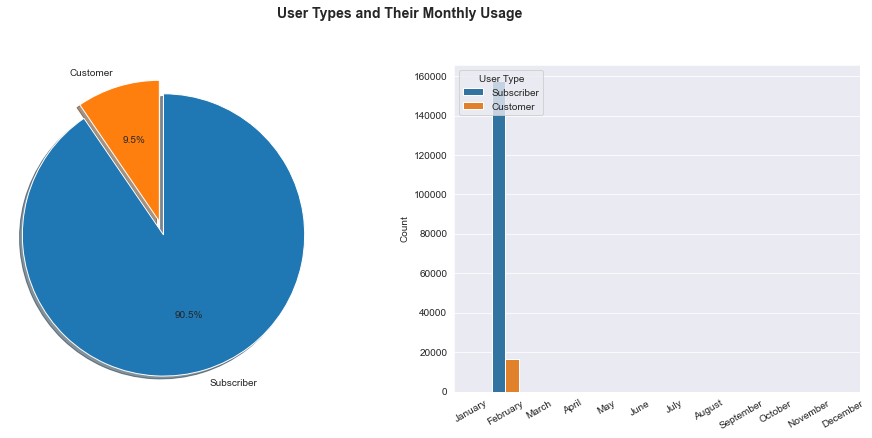

In [4]:
plt.figure(figsize=[16, 6]);
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');

plt.subplot(1, 2, 1);
sorted_vals = ford_bike_clean.user_type.value_counts()/ford_bike_clean.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

plt.subplot(1, 2, 2);
ax = sb.countplot(data=ford_bike_clean, x='start_month', hue='user_type', hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.xlabel('');
plt.ylabel('Count');
plt.suptitle('User Types and Their Monthly Usage', fontsize=14, fontweight='semibold', y=1.015);

## (Visualization 2)

>  Concentrated trips around 0800hours-0900hours and 1700hours-1800hours on work days for subscribers during weekdays which sclearly indicate thier usage is for commuting to work, while casual customers tended to use more in the late afternoon around 17pm Monday to Friday. Other than the different usage goals, it may also have to do with the traffic situation around these rush hours in the area.

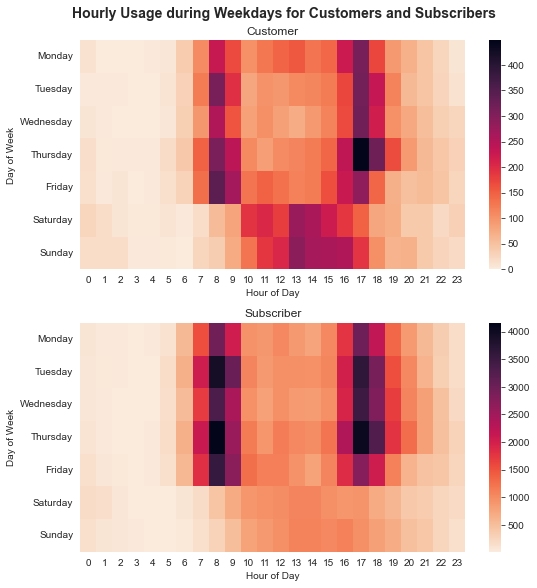

In [5]:
plt.figure(figsize=[8, 8]);

plt.subplot(2, 1, 1)
customers = ford_bike_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();

plt.subplot(2, 1, 2)
subscribers = ford_bike_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015);

## (Visualization 3)
> Subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types had an obvious increase of trip duration on Saturdays and Sundays (or weekends), especially casual customers. Subscriber usage was more efficient than customers overall and maintained a pretty consistent average duration Monday through Friday.

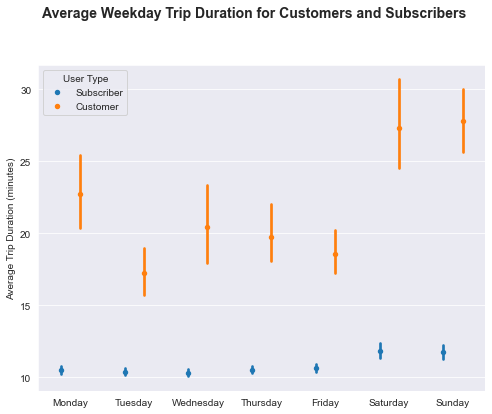

In [6]:
plt.figure(figsize=[8, 6]);
ax = sb.pointplot(data=ford_bike_clean, x='start_day_of_week', y='duration_minute', hue='user_type', dodge=0.3, markers='.', linestyles="", hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xlabel('');
plt.ylabel('Average Trip Duration (minutes)');
plt.suptitle('Average Weekday Trip Duration for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015);

In [8]:
!jupyter nbconvert Slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Slide_deck.ipynb to slides
[NbConvertApp] Writing 722134 bytes to Slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\OWNER\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\OWNER\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\OWNER\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\OWNER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\OWNER\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_